In [1]:
%matplotlib notebook

# Dependencies
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit2020_csv = "MetroTransit_2020.csv"

# Read with Pandas
metrotransit2020_df = pd.read_csv(metrotransit2020_csv)
metrotransit2020_df.head()

,week,week_of,srv,route_class,line_id,dir,trip_cnt,obs_trips,seq,site_id,location,ons,offs
0,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,1.0,19337,Leamington Ramp & Lower - Gate #7,114.650000,24.766667
1,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,2.0,19277,3rd Ave S & 11th St S,10.366667,2.733333
2,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,3.0,41911,2nd Ave S & Convention Center,35.000000,1.166667
3,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,4.0,17988,Nicollet Mall & Alice Rainville,119.566667,3.533333
4,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,5.0,17990,Nicollet Mall & 11th St S,140.816667,4.050000


<IPython.core.display.Javascript object>


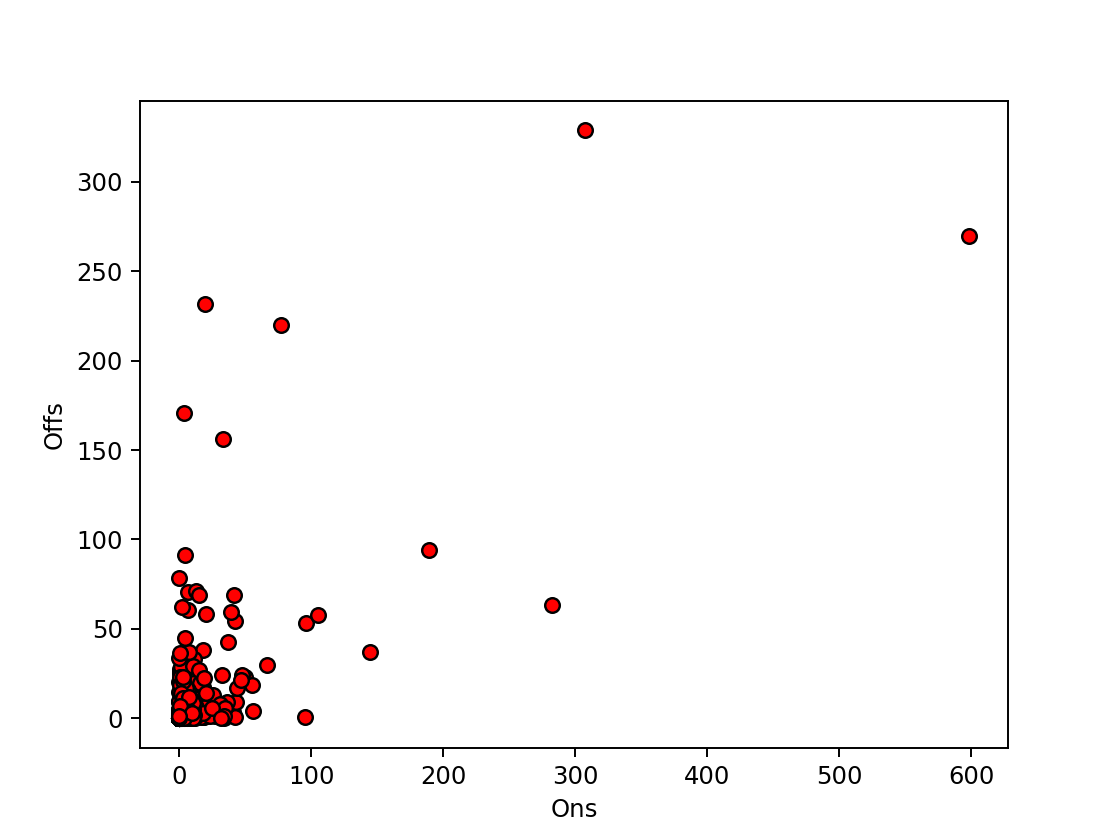

<function matplotlib.pyplot.show(*args, **kw)>

In [2]:
sample_df = metrotransit2020_df.sample(n = 500)

ons = sample_df["ons"]
offs = sample_df["offs"]

plt.scatter(ons, offs, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Ons")
plt.ylabel("Offs")
plt.show

In [9]:
# Line plot showing week-to-week change for highest ON location

highest_on_df = metrotransit2020_df.loc[metrotransit2020_df["location"]=="7th & Nicollet Station"]
highest_on_df.head()

,week,week_of,srv,route_class,line_id,dir,trip_cnt,obs_trips,seq,site_id,location,ons,offs
2496,5,1/27/2020,WK,CoreLoc,19,North,35,34.0,7.0,17902,7th & Nicollet Station,161.566667,26.300000
2497,5,1/27/2020,WK,SupportLoc,19,North,35,34.0,7.0,17902,7th & Nicollet Station,161.566667,26.300000
5648,5,1/27/2020,WK,CoreLoc,3,West,5,5.0,126.0,17902,7th & Nicollet Station,0.000000,9.550000
6193,5,1/27/2020,WK,SupportLoc,39,North,4,4.0,13.0,17902,7th & Nicollet Station,0.200000,16.850000
7080,5,1/27/2020,WK,CoreLoc,5,North,124,122.0,81.0,17902,7th & Nicollet Station,469.916667,508.533333


In [14]:
highest_on_df.groupby("week_of")
highest_on_df

,week,week_of,srv,route_class,line_id,dir,trip_cnt,obs_trips,seq,site_id,location,ons,offs
2496,5,1/27/2020,WK,CoreLoc,19,North,35,34.0,7.0,17902,7th & Nicollet Station,161.566667,26.300000
2497,5,1/27/2020,WK,SupportLoc,19,North,35,34.0,7.0,17902,7th & Nicollet Station,161.566667,26.300000
5648,5,1/27/2020,WK,CoreLoc,3,West,5,5.0,126.0,17902,7th & Nicollet Station,0.000000,9.550000
6193,5,1/27/2020,WK,SupportLoc,39,North,4,4.0,13.0,17902,7th & Nicollet Station,0.200000,16.850000
7080,5,1/27/2020,WK,CoreLoc,5,North,124,122.0,81.0,17902,7th & Nicollet Station,469.916667,508.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168800,16,4/13/2020,WK,CoreLoc,5,North,82,70.0,81.0,17902,7th & Nicollet Station,171.083333,196.000000
168801,16,4/13/2020,WK,CoreLoc,5,North,82,70.0,82.0,17902,7th & Nicollet Station,85.750000,100.666667
173152,16,4/13/2020,WK,SuburbLoc,721,North,3,3.0,7.0,17902,7th & Nicollet Station,5.166667,2.000000
176058,16,4/13/2020,WK,CommExpress,923,North,87,84.0,4.0,17902,7th & Nicollet Station,473.583333,61.500000


In [10]:
# Line plot showing week-to-week change for highest OFF location

highest_off_df = metrotransit2020_df.loc[metrotransit2020_df["location"]=="Nicollet Mall & 7th St S"]
highest_off_df.head()

,week,week_of,srv,route_class,line_id,dir,trip_cnt,obs_trips,seq,site_id,location,ons,offs
6,5,1/27/2020,WK,CoreLoc,10,North,99,99.0,7.0,17994,Nicollet Mall & 7th St S,575.116667,67.683333
205,5,1/27/2020,WK,CoreLoc,10,South,96,94.0,99.0,17980,Nicollet Mall & 7th St S,111.600000,536.316667
255,5,1/27/2020,WK,CoreLoc,11,North,66,65.0,44.0,17994,Nicollet Mall & 7th St S,267.400000,255.900000
347,5,1/27/2020,WK,CoreLoc,11,South,66,66.0,48.0,17980,Nicollet Mall & 7th St S,202.983333,255.716667
794,5,1/27/2020,WK,CoreLoc,12,East,19,19.0,91.0,17994,Nicollet Mall & 7th St S,9.483333,153.016667
